# Economic Well-Being Prediction Challenge

Welcome! In this challenge, we will be attempting to predict a measure of wealth for different locations across Africa. We will take a look at the data, create a model and then use that to make our submission. After that we will briefly look at some ways to improve. Let's get started.

# Loading the Data

We're using the pandas library to load the data into dataframes - a tabular data structure that is perfect for this kind of work. Each of the three CSV files from Zindi is loaded into a dataframe and we take a look at the shape of the data (number of rows and columns) as well as a preview of the first 5 rows to get a feel for what we're working with.

In [5]:
from google.colab import files
files.upload()

Saving SampleSubmission.csv to SampleSubmission.csv


{'SampleSubmission.csv': b'ID,Target\nID_AAcismbB,0\nID_AAeBMsji,0\nID_AAjFMjzy,0\nID_AAmMOEEC,0\nID_ABguzDxp,0\nID_ABomWihE,0\nID_ACDBDjVC,0\nID_AEnEBaEk,0\nID_AFDiXCWE,0\nID_AFFdlZrY,0\nID_AFFhrAEa,0\nID_AFTYARrX,0\nID_AFxizGWn,0\nID_AGXURqVa,0\nID_AGcfrBss,0\nID_AGhyJnjs,0\nID_AHHszlce,0\nID_AHfEgdxI,0\nID_AHxMZjLk,0\nID_AIRMTzvW,0\nID_AIhXjNzB,0\nID_AInNJcPZ,0\nID_AJeUKOax,0\nID_AJtmZTPv,0\nID_AJvMJUgh,0\nID_AKDNaIeF,0\nID_AKtFUCOh,0\nID_ALMWkcWZ,0\nID_ALsuDzjy,0\nID_AMDeLpAe,0\nID_AMFLUESH,0\nID_AMPzBaLI,0\nID_AMQunDcB,0\nID_AMoeaBNL,0\nID_AMqLADVZ,0\nID_ANjdaLZT,0\nID_ANmZqeaJ,0\nID_AOSShqiH,0\nID_AOtbKdTz,0\nID_APPZTAvk,0\nID_APXZieOd,0\nID_APYmHMeT,0\nID_APqxpzOM,0\nID_AQXRdQFe,0\nID_AQahPNSl,0\nID_ASJBnAcz,0\nID_ASScpzpo,0\nID_ASYEmqFR,0\nID_ASYmdsAQ,0\nID_ASizsGwc,0\nID_ATGMmtfy,0\nID_ATfXaLki,0\nID_ATvhCiLv,0\nID_AUYDTXht,0\nID_AUgbYLcu,0\nID_AUikRRXA,0\nID_AWFsJxKf,0\nID_AWMJnaEH,0\nID_AWUFocya,0\nID_AWkhcJQd,0\nID_AXFMbyYb,0\nID_AXpXAnqG,0\nID_AYFCJcwy,0\nID_AYbBsLeO,0\nID

In [3]:
from google.colab import files
files.upload()

Saving Test.csv to Test.csv


{'Test.csv': b'ID,country,year,urban_or_rural,ghsl_water_surface,ghsl_built_pre_1975,ghsl_built_1975_to_1990,ghsl_built_1990_to_2000,ghsl_built_2000_to_2014,ghsl_not_built_up,ghsl_pop_density,landcover_crops_fraction,landcover_urban_fraction,landcover_water_permanent_10km_fraction,landcover_water_seasonal_10km_fraction,nighttime_lights,dist_to_capital,dist_to_shoreline\nID_AAcismbB,Democratic Republic of Congo,2007,R,0.0,0.0,0.0,0.0005227648343856845,0.00013069120859642111,0.999346543957018,0.6607576046637272,0.9909424233542292,0.13226394671232994,0.06905450691251426,0.03262657441518221,0.0,1249.294720268114,1364.5921001884046\nID_AAeBMsji,Democratic Republic of Congo,2007,U,0.0,0.004238546922183035,0.00023781925212076758,0.001226631324913429,0.00285973459867072,0.991437267902112,6.441546916481327,5.461365252905057,0.4523995357128883,0.0,0.0,0.0,821.0195789052555,1046.0286810067332\nID_AAjFMjzy,Uganda,2011,U,0.0073594102750261705,0.5256815999498012,0.13279512946042768,0.095416039002731

In [4]:
from google.colab import files
files.upload()

Saving Train.csv to Train.csv


{'Train.csv': b"ID,country,year,urban_or_rural,ghsl_water_surface,ghsl_built_pre_1975,ghsl_built_1975_to_1990,ghsl_built_1990_to_2000,ghsl_built_2000_to_2014,ghsl_not_built_up,ghsl_pop_density,landcover_crops_fraction,landcover_urban_fraction,landcover_water_permanent_10km_fraction,landcover_water_seasonal_10km_fraction,nighttime_lights,dist_to_capital,dist_to_shoreline,Target\nID_AAIethGy,Ethiopia,2016,R,0.0,0.0,0.0,5.549358570316941e-05,0.0005364379951306376,0.9994080684191662,12.146133952329931,25.48965902738959,0.8794843450450454,0.0,0.0,0.0,278.7884505908687,769.3383780420382,0.13278265530149\nID_AAYiaCeL,Ethiopia,2005,R,0.0,0.0,0.0001098293460136218,0.0,1.83048910022703e-05,0.999871865762984,113.80671627415636,64.13605338550413,0.601427230888323,0.0,0.005426635877772812,0.0,200.98697800356385,337.13524334720745,0.004898370950451048\nID_AAdurmKj,Mozambique,2009,R,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.400096267436051,0.13190011283262915,0.0,0.0030779504498961692,0.0,642.5942075736064,169.9

In [7]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [8]:
train = pd.read_csv('Train.csv')
print(train.shape)
train.head()

(21454, 19)


ID     country  year  ... dist_to_capital  dist_to_shoreline    Target
0  ID_AAIethGy    Ethiopia  2016  ...      278.788451         769.338378  0.132783
1  ID_AAYiaCeL    Ethiopia  2005  ...      200.986978         337.135243  0.004898
2  ID_AAdurmKj  Mozambique  2009  ...      642.594208         169.913773  0.097320
3  ID_AAgNHles      Malawi  2015  ...      365.349451         613.591610  0.304107
4  ID_AAishfND      Guinea  2012  ...      222.867189         192.926363  0.605328

[5 rows x 19 columns]

In train, we have a set of inputs (like 'urban_or_rural' or 'ghsl_water_surface') and our desired output variable, 'Target'. There are 21454 rows - lots of juicy data!

In [9]:
test = pd.read_csv('Test.csv')
print(test.shape)
test.head()

(7194, 18)


ID  ... dist_to_shoreline
0  ID_AAcismbB  ...       1364.592100
1  ID_AAeBMsji  ...       1046.028681
2  ID_AAjFMjzy  ...        906.057334
3  ID_AAmMOEEC  ...        775.139189
4  ID_ABguzDxp  ...        835.591501

[5 rows x 18 columns]

Test looks just like train but without the 'Target' column and with fewer rows.

In [10]:
ss = pd.read_csv('SampleSubmission.csv')
print(ss.shape)
ss.head()

(7194, 2)


ID  Target
0  ID_AAcismbB       0
1  ID_AAeBMsji       0
2  ID_AAjFMjzy       0
3  ID_AAmMOEEC       0
4  ID_ABguzDxp       0

The sample submission is just the ID column from test with a 'Target' column where we will put out predictions.

Now that we have the data loaded, we can start cleaning data and exploring.

But before cleaning data and exploring it let's look at some basic info about our data and stats

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21454 entries, 0 to 21453
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ID                                       21454 non-null  object 
 1   country                                  21454 non-null  object 
 2   year                                     21454 non-null  int64  
 3   urban_or_rural                           21454 non-null  object 
 4   ghsl_water_surface                       21454 non-null  float64
 5   ghsl_built_pre_1975                      21454 non-null  float64
 6   ghsl_built_1975_to_1990                  21454 non-null  float64
 7   ghsl_built_1990_to_2000                  21454 non-null  float64
 8   ghsl_built_2000_to_2014                  21454 non-null  float64
 9   ghsl_not_built_up                        21454 non-null  float64
 10  ghsl_pop_density                         21454

In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7194 entries, 0 to 7193
Data columns (total 18 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ID                                       7194 non-null   object 
 1   country                                  7194 non-null   object 
 2   year                                     7194 non-null   int64  
 3   urban_or_rural                           7194 non-null   object 
 4   ghsl_water_surface                       7194 non-null   float64
 5   ghsl_built_pre_1975                      7194 non-null   float64
 6   ghsl_built_1975_to_1990                  7194 non-null   float64
 7   ghsl_built_1990_to_2000                  7194 non-null   float64
 8   ghsl_built_2000_to_2014                  7194 non-null   float64
 9   ghsl_not_built_up                        7194 non-null   float64
 10  ghsl_pop_density                         7194 no

In [13]:
train.isnull().sum()

ID                                         0
country                                    0
year                                       0
urban_or_rural                             0
ghsl_water_surface                         0
ghsl_built_pre_1975                        0
ghsl_built_1975_to_1990                    0
ghsl_built_1990_to_2000                    0
ghsl_built_2000_to_2014                    0
ghsl_not_built_up                          0
ghsl_pop_density                           0
landcover_crops_fraction                   0
landcover_urban_fraction                   0
landcover_water_permanent_10km_fraction    0
landcover_water_seasonal_10km_fraction     0
nighttime_lights                           0
dist_to_capital                            0
dist_to_shoreline                          0
Target                                     0
dtype: int64

In [14]:
test.isnull().sum()

ID                                         0
country                                    0
year                                       0
urban_or_rural                             0
ghsl_water_surface                         0
ghsl_built_pre_1975                        0
ghsl_built_1975_to_1990                    0
ghsl_built_1990_to_2000                    0
ghsl_built_2000_to_2014                    0
ghsl_not_built_up                          0
ghsl_pop_density                           0
landcover_crops_fraction                   0
landcover_urban_fraction                   0
landcover_water_permanent_10km_fraction    0
landcover_water_seasonal_10km_fraction     0
nighttime_lights                           0
dist_to_capital                            0
dist_to_shoreline                          0
dtype: int64

In [15]:
train.describe()

year  ghsl_water_surface  ...  dist_to_shoreline        Target
count  21454.000000        21454.000000  ...       21454.000000  21454.000000
mean    2010.060874            0.028259  ...         402.608539      0.350736
std        4.799579            0.097490  ...         321.517285      0.194376
min     1994.000000            0.000000  ...           0.112080      0.000000
25%     2008.000000            0.000000  ...         126.379463      0.195772
50%     2011.000000            0.000000  ...         327.271973      0.293574
75%     2014.000000            0.000000  ...         643.910675      0.499003
max     2016.000000            0.969956  ...        1769.523906      1.000000

[8 rows x 16 columns]

Unfortunately we don't have any missing values so we will go straight to Exploratory Data Analysis

# EDA

We will explore some trends in the data and look for any anomalies such as missing data and trends.

First up: let's see how an input like 'nighttime lights' relates to the target column:

In [16]:
train.head(2)

ID   country  year  ... dist_to_capital  dist_to_shoreline    Target
0  ID_AAIethGy  Ethiopia  2016  ...      278.788451         769.338378  0.132783
1  ID_AAYiaCeL  Ethiopia  2005  ...      200.986978         337.135243  0.004898

[2 rows x 19 columns]

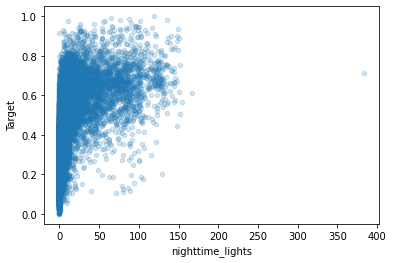

In [ ]:
# Plotting the relationship between an input column and the target
train.plot(x='nighttime_lights', y='Target', kind='scatter', alpha=0.2)

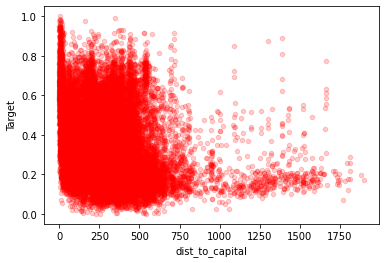

In [22]:
# Plotting the relationship between an input column and the target
train.plot(x='dist_to_capital', y='Target', kind='scatter',color='red',alpha=0.2)

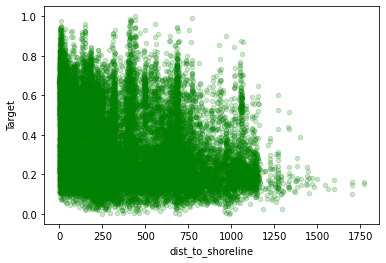

In [23]:
# Plotting the relationship between an input column and the target
train.plot(x='dist_to_shoreline', y='Target', kind='scatter',color='green' ,alpha=0.2)

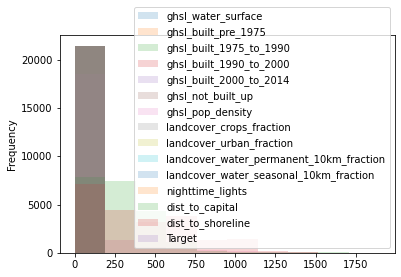

In [24]:
#lets look at distributions of years
train.plot(x='year',kind='hist',alpha=0.2)

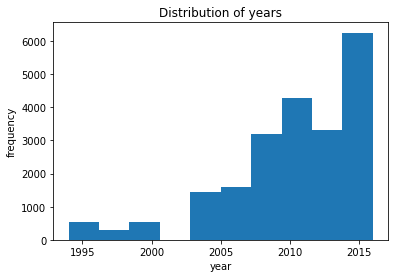

In [27]:
#looking at yeras
plt.hist(train['year'])
plt.ylabel('frequency')
plt.xlabel('year')
plt.title('Distribution of years')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 73.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 73.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 77.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 85.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 87.9% of the points cannot be placed; y

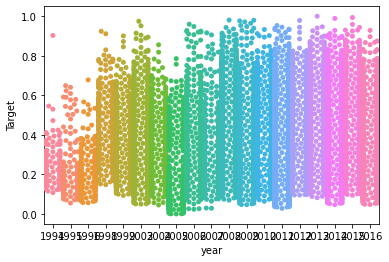

In [34]:
#plot target vs year
sns.swarmplot(x='year',y='Target',data=train)

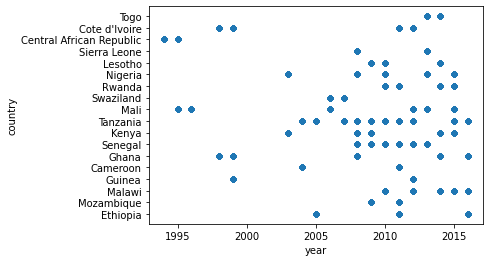

In [28]:
train.plot(x='year',y='country',kind='scatter')

In [ ]:
# Exercise: Try this with different inputs. Any unexpected trends?

As you might have guessed, places that emit more light tend to be wealthier, but there is a lot of variation.

We can also look at categorical columns like 'country' or 'urban_vs_rural' and see the distribution of the target for each group:

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


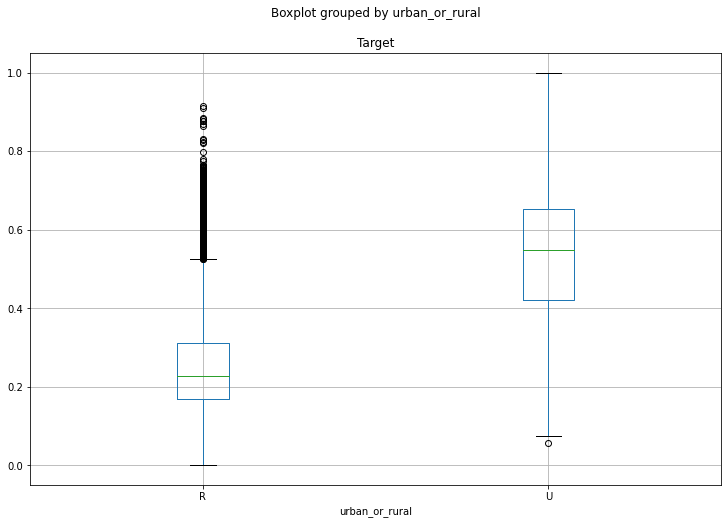

In [ ]:
# Looking at the wealth distribution for urban vs rural
train.boxplot(by='urban_or_rural', column='Target', figsize=(12, 8))

Again, not unexpected. Rural areas tend to be less wealthy than urban areas.

Now the scary question: do we have missing data to deal with?

In [ ]:
train.isna().sum() # Hooray - no missing data!

ID                                         0
country                                    0
year                                       0
urban_or_rural                             0
ghsl_water_surface                         0
ghsl_built_pre_1975                        0
ghsl_built_1975_to_1990                    0
ghsl_built_1990_to_2000                    0
ghsl_built_2000_to_2014                    0
ghsl_not_built_up                          0
ghsl_pop_density                           0
landcover_crops_fraction                   0
landcover_urban_fraction                   0
landcover_water_permanent_10km_fraction    0
landcover_water_seasonal_10km_fraction     0
nighttime_lights                           0
dist_to_capital                            0
dist_to_shoreline                          0
Target                                     0
dtype: int64

See what other trends you can uncover - we have only scratched the surface here. 

# Modelling

We've had a look at our data and it looks good! Let's see if we can create a model to predict the Target given some of our inputs. To start with we will use only the numeric columns, so that we can fit a model right away. 

In [35]:
in_cols = list(train.columns[4:-1])
print('Input columns:', in_cols)

Input columns: ['ghsl_water_surface', 'ghsl_built_pre_1975', 'ghsl_built_1975_to_1990', 'ghsl_built_1990_to_2000', 'ghsl_built_2000_to_2014', 'ghsl_not_built_up', 'ghsl_pop_density', 'landcover_crops_fraction', 'landcover_urban_fraction', 'landcover_water_permanent_10km_fraction', 'landcover_water_seasonal_10km_fraction', 'nighttime_lights', 'dist_to_capital', 'dist_to_shoreline']


In [36]:
in_co=(train[4:-1])
print(in_co)

                ID   country  ...  dist_to_shoreline    Target
4      ID_AAishfND    Guinea  ...         192.926363  0.605328
5      ID_AAnetgMr  Ethiopia  ...         487.790852  0.463882
6      ID_ABOoaqlI  Cameroon  ...         477.563353  0.133302
7      ID_ABRVEEtG     Ghana  ...         435.816271  0.545138
8      ID_ABbCEbbL   Senegal  ...         320.867328  0.590187
...            ...       ...  ...                ...       ...
21448  ID_zzJKKqnw   Nigeria  ...          12.090552  0.649643
21449  ID_zzPvDPjQ   Nigeria  ...         159.790057  0.624088
21450  ID_zzQoPhjZ   Senegal  ...         122.976960  0.250042
21451  ID_zzQuWZBF     Ghana  ...         155.365355  0.314871
21452  ID_zzqCGLvb     Ghana  ...         534.638628  0.237831

[21449 rows x 19 columns]


To evaluate our model, we need to keep some data separate. We will split out data into X (inputs) and y (output) and then further split into train and test sets with the following code:

In [38]:
from sklearn.model_selection import train_test_split

X, y = train[in_cols], train['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=58) # Random state keeps the split consistent
print(X_train.shape, X_test.shape)

(17163, 14) (4291, 14)


We now have a nice test set of ~4200 rows. We will train our model and then use this test set to calculate our score.

In [39]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor() # Create the model
model.fit(X_train, y_train) # Train it (this syntax looks the same for all sklearn models)
model.score(X_test, y_test) # Show a score

0.7018893140058646

What is the score above? The default for regression models is the R^2 score, a measure of how well the mode does at predicting the target. 0.69 is pretty good - let's plot the predictions vs the actual values and see how close it looks to a straight line:

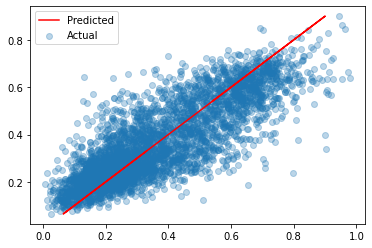

In [ ]:
from matplotlib import pyplot as plt
plt.scatter(y_test, model.predict(X_test), alpha=0.3,label='Actual')
plt.plot(model.predict(X_test),model.predict(X_test),color='red',label='Predicted')
plt.legend()

This looks great - most predictions are nice and close to the true value! But we still don't have a way to link this to the leaderboard score on Zindi. Let's remedy that by calculating the Root Mean Squared Error, the same metric Zindi uses. 

In [40]:
from sklearn.metrics import mean_squared_error

# The `squared=False` bit tells this function to return the ROOT mean squared error
mean_squared_error(y_test, model.predict(X_test), squared=False)

0.10758287640637756

Great stuff. Let's make a submission and then move on to looking for ways to improve.

In [41]:
# Copying our predictions into the submission dataframe - make sure the rows are in the same order!
ss['Target'] = model.predict(test[in_cols]) 
ss.head()

ID    Target
0  ID_AAcismbB  0.162572
1  ID_AAeBMsji  0.159415
2  ID_AAjFMjzy  0.645536
3  ID_AAmMOEEC  0.301545
4  ID_ABguzDxp  0.244522

We now have our predictions in the right format to submit. The following line saves this to a file that you can then upload to get a score:

In [42]:
ss.to_csv('first_submission.csv', index=False)

In [43]:
files.download('first_submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Getting Better

 

So our first step might be to make a scoring function that splits the data according to country, and measures the model performance on unseen countries. Try it and share  testing methods. And look at the following questions:
- Does your score drop when you score your model on countries it wasn't trained with?
- Does the new score more accurately match the leaderboard score?
- Are any countries particularly 'hard' to make predictions in?

Knowing how well our model is doing is useful, but however you measure that we also need ways to improve this performance! There are a few ways to do this:

- Feed the model better data. How? Feature engineering! If we can add meaningful features the model will have more data to work with.
- Tune your models. We used the default parameters - perhaps we can tweak some hyperparameters to make our models better
- Try fancier models. Perhaps XGBoost or a neural network is better than Random Forest at this task

Let's do a little of each. First up, let's create a numeric feature that encodes the 'urban_or_rural' column as something the model can use:

In [44]:
# Turning a categorical column into a numeric feature
train['is_urban'] = (train['urban_or_rural'] == 'U').astype(int)
test['is_urban'] = (test['urban_or_rural'] == 'U').astype(int)
train.head()

ID     country  year  ... dist_to_shoreline    Target  is_urban
0  ID_AAIethGy    Ethiopia  2016  ...        769.338378  0.132783         0
1  ID_AAYiaCeL    Ethiopia  2005  ...        337.135243  0.004898         0
2  ID_AAdurmKj  Mozambique  2009  ...        169.913773  0.097320         0
3  ID_AAgNHles      Malawi  2015  ...        613.591610  0.304107         0
4  ID_AAishfND      Guinea  2012  ...        192.926363  0.605328         1

[5 rows x 20 columns]


Note that whenever we add features to train, *we also need to add them to test* otherwise we won't be able to make our predictions.

With this extra feature, we can fit a new model:

In [ ]:
in_cols.append('is_urban') # Adding the new features to our list of input columns

# Replace this with your chosen method for evaluating a model:
X, y = train[in_cols], train['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=58)
model = RandomForestRegressor(max_depth=8)
model.fit(X_train, y_train)
mean_squared_error(y_test, model.predict(X_test), squared=False)
ss['Target'] = model.predict(test[in_cols]) 
ss.head()
ss.to_csv('fifth_submission.csv', index=False)

In [ ]:
files.download('fifth_submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

score improve?

Next, let's tune our model by adjusting the maximum depth. This is one of many hyperparameters that can be tweaked on a Random Forest model. Here I just try a few randomly chosen values, but you could also use a grid search to try values more methodically.

In [ ]:
for max_depth in [3, 5, 8, 10, 14, 18]:
    model = RandomForestRegressor()
    # Again, you van use a better method to evaluate the model here...
    model.fit(X_train, y_train)
    print(max_depth, mean_squared_error(y_test, model.predict(X_test), squared=False))

3 0.10430028830152421
5 0.10436966998205752
8 0.10450948091740228
10 0.10438364851981403
14 0.10438469950718586
18 0.10428580933637184


In this case, it looks like we can improve our performance by specifying a max_depth to limit model complexity.

Finally, let's try a different model out of curiosity:

In [ ]:
!pip install catboost

     |████████████████████████████████| 69.2MB 49kB/s 


In [ ]:
from catboost import CatBoostRegressor

models = CatBoostRegressor()
# Exercise: fit and score the model. Does it beat your other scores? Can you use it to make a submission?
models.fit(X_train,y_train)

ss['Target'] = models.predict(test[in_cols]) 
ss.head()
ss.to_csv('second_submission.csv', index=False)


Learning rate set to 0.064738
0:	learn: 0.1859024	total: 5.3ms	remaining: 5.3s
1:	learn: 0.1790388	total: 10.4ms	remaining: 5.21s
2:	learn: 0.1723666	total: 15.5ms	remaining: 5.15s
3:	learn: 0.1665203	total: 20.6ms	remaining: 5.14s
4:	learn: 0.1610292	total: 26ms	remaining: 5.18s
5:	learn: 0.1561064	total: 31.5ms	remaining: 5.23s
6:	learn: 0.1517875	total: 36.9ms	remaining: 5.24s
7:	learn: 0.1477084	total: 42.3ms	remaining: 5.24s
8:	learn: 0.1438224	total: 47.7ms	remaining: 5.25s
9:	learn: 0.1404193	total: 53.1ms	remaining: 5.26s
10:	learn: 0.1373115	total: 58.4ms	remaining: 5.25s
11:	learn: 0.1344731	total: 63.7ms	remaining: 5.25s
12:	learn: 0.1319334	total: 69ms	remaining: 5.24s
13:	learn: 0.1297552	total: 74.8ms	remaining: 5.27s
14:	learn: 0.1278401	total: 80.2ms	remaining: 5.27s
15:	learn: 0.1259511	total: 85.6ms	remaining: 5.26s
16:	learn: 0.1242936	total: 90.9ms	remaining: 5.25s
17:	learn: 0.1227106	total: 96.2ms	remaining: 5.25s
18:	learn: 0.1212546	total: 101ms	remaining: 5.23s

In [ ]:
#catboost prediction
files.download('second_submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import lightgbm as lgb
gbm = lgb.LGBMRegressor()
gbm.fit(X_train, y_train)

ss['Target'] = gbm.predict(test[in_cols]) 
ss.head()
ss.to_csv('third_submission.csv', index=False)

In [ ]:
files.download('third_submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>